In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp

## Part 1: The Ideal Case
___

In [2]:
# Simple free-fall with no drag
# Initializing variables
g = 9.81   # m /s^2
x0 = 4e3   # meters

# Calculating the free-fall time and displaying
fft = np.sqrt(2 * x0 / 9.8)
print(f"The free fall time for a test object falling 4 km is {fft:.3f} seconds.")

The free fall time for a test object falling 4 km is 28.571 seconds.


$$
\frac{d^2y}{dt^2} = -g - \alpha (\frac{dy}{dt})^\gamma
$$
System of coupled first order differential equations:
$$
\frac{dy}{dt} = v
$$
$$
\frac{dv}{dt} = -g - \alpha v^\gamma
$$

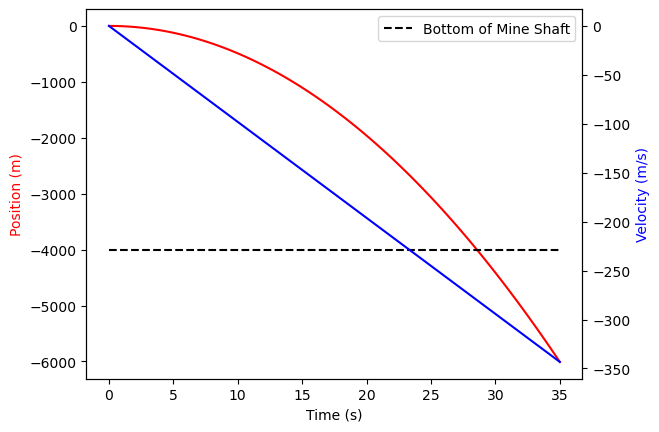

In [3]:
# Intializing variables
# Drag variables
alpha = 0
gamma = 0

# Free-Fal function
def free_fall(t, s):
    y, v = s
    dydt = v
    dvdt = -g - alpha * v**gamma
    return dydt, dvdt

# Time span
t0, tf = 0, 35

# Initial Conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 100)

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall, t_span = (t0, tf), y0 = [y0, v0], t_eval = time)
# Storing results of calculation into variables
x = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Plotting the position as a function of time
fig, ax_ff_p = plt.subplots(1, 1)
ax_ff_p.plot(x, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')

# Plotting the velocity as a function of time as a twin axis as the position
ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Plotting horizontal line representing the bottom of the mine shaft at 4 km
ax_ff_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
ax_ff_p.legend();

The test match reach the bottom in 28.557 seconds.



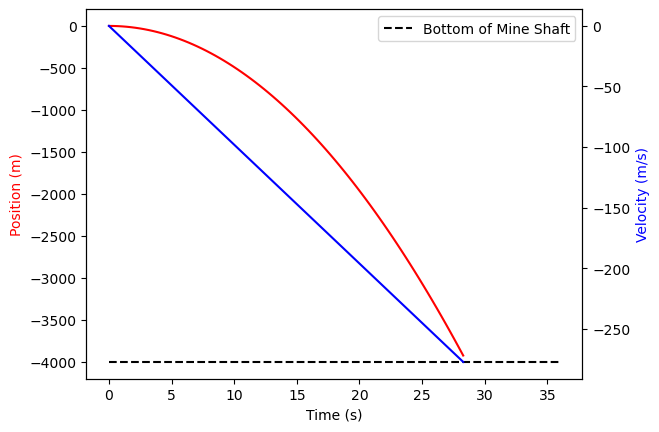

In [4]:
# Stopping fuction to detect when test mass reach bottom of mine shaft
def stopping_shaft(t, y):
    return y[0] + 4000
stopping_shaft.terminal = True

# Again solving the equation, but with an event to stop when the test mass reach the bottom of the mine shaft
soln = solve_ivp(fun = free_fall, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stopping_shaft)
x = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Re-Plotting the same plot as above, but with stopping event
fig, ax_ff_p = plt.subplots(1, 1)
ax_ff_p.plot(x, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')

ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

ax_ff_p.hlines(-4000, t0, tf + 1, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
ax_ff_p.legend();

# Printing the time it take for the test mass to reach the bottom of the mine shaft according to the differential equations
print(f"The test match reach the bottom in {float(soln.t_events[0]):.3f} seconds.\n")

## Part 2: Including Drag and a Variable g
___

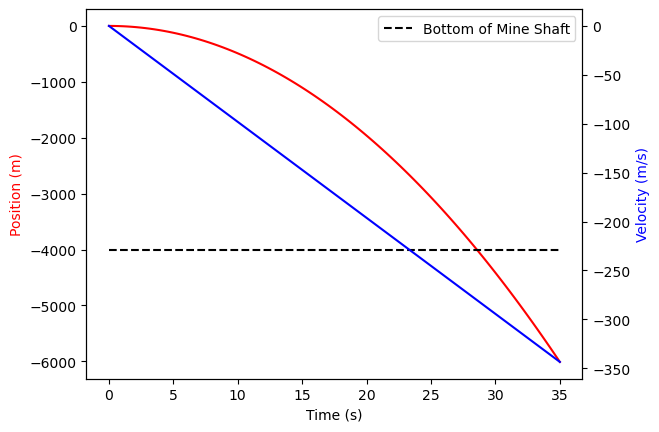

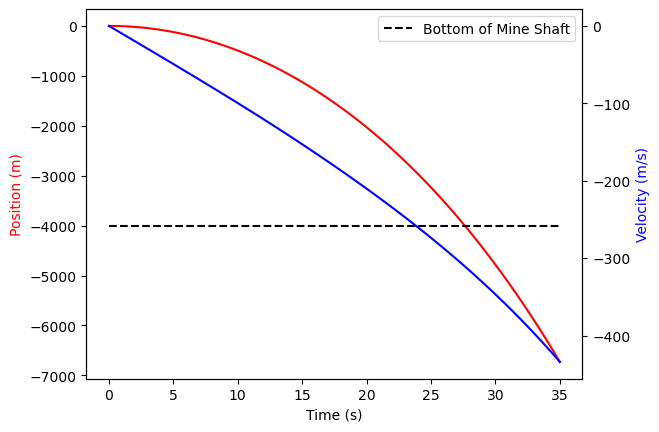

In [5]:
# The radius and surface gravity of the Earth
r_earth = 6.3781e6  # meters
g0 = 9.81           # m/s^2

# Defining function to calculate gravity as a function of distance from center
def g_r(r):
    return g0 * (r / r_earth)

# Drag force variables
alpha = 0
gamma = 0

# Free-Fall function but with gravity function
def free_fall_g(t, s):
    y, v = s
    dydt = v
    dvdt = -g_r(np.abs(r_earth - y)) - alpha * v**gamma
    return dydt, dvdt
    
# Time span
t0, tf = 0, 35

# Initial Conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 100)

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time)
x = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Plotting the results of the calculation
fig, ax_ff_p = plt.subplots(1, 1)
ax_ff_p.plot(x, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')

ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

ax_ff_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft");
ax_ff_p.legend()

# Setting values to drag force variables
alpha = 0.00005
gamma = 2

# Solving again with 'solve_ivp'
soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time)
x = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Plotting results with drag
fig, ax_ff_drag_p = plt.subplots(1, 1)
ax_ff_drag_p.plot(x, position, color = 'red')
ax_ff_drag_p.set_xlabel("Time (s)")
ax_ff_drag_p.set_ylabel("Position (m)", color = 'red')

ax_ff_drag_v = ax_ff_drag_p.twinx()
ax_ff_drag_v.plot(x, velocity, color = 'blue')
ax_ff_drag_v.set_ylabel("Velocity (m/s)", color = 'blue')

ax_ff_drag_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft");
ax_ff_drag_p.legend();

## Part 3: The Coriolis Force
___

In [6]:
'''omega = 7.272e5   # rad /s
def coriolis_force(vx, vy, vz):
    Fx = 2 * omega * vy
    Fy = -2 * omega * vx
    Fz = 0
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    Fc = np.sqrt(Fx**2 + Fy**2 + Fz**2)
    return Fc

def free_fall(t, s):
    y, v = s
    dydt = v
    dvdt = -g_r(r_earth - y) - alpha * v**gamma
    return dydt, dvdt'''

'omega = 7.272e5   # rad /s\ndef coriolis_force(vx, vy, vz):\n    Fx = 2 * omega * vy\n    Fy = -2 * omega * vx\n    Fz = 0\n    v = np.sqrt(vx**2 + vy**2 + vz**2)\n    Fc = np.sqrt(Fx**2 + Fy**2 + Fz**2)\n    return Fc\n\ndef free_fall(t, s):\n    y, v = s\n    dydt = v\n    dvdt = -g_r(r_earth - y) - alpha * v**gamma\n    return dydt, dvdt'

## Part 4: An Infinitely Deep Mine
___

The test mass pass through the entire Earth in 1421.304 seconds.

The test mass reach the center of the Earth in 1061.990 seconds with a speed of 13571.595.

The orbital period is 7905.277129890415 m/s.


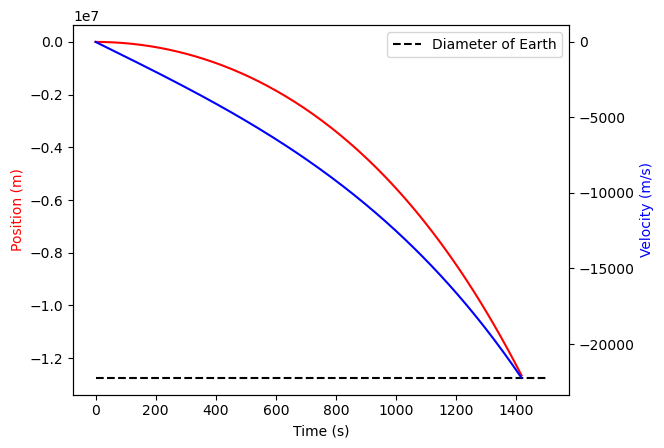

In [7]:
# No drag force so variables ore zero
alpha = 0
gamma = 0

# Time span, but increased to give more time for the test mass to pass through Earth
t0, tf = 0, 1500

# Initial Conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 200)

# Stopping fuction to detect when the test mass reach diameter of Earth
def stopping_earth(t, y):
    return y[0] + (2 * r_earth)
stopping_earth.terminal = True

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stopping_earth)
x = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Plotting results of new calculation
fig, ax_ff_earth_p = plt.subplots(1, 1)
ax_ff_earth_p.plot(x, position, color = 'red')
ax_ff_earth_p.set_xlabel("Time (s)")
ax_ff_earth_p.set_ylabel("Position (m)", color = 'red')

ax_ff_earth_v = ax_ff_earth_p.twinx()
ax_ff_earth_v.plot(x, velocity, color = 'blue')
ax_ff_earth_v.set_ylabel("Velocity (m/s)", color = 'blue')

ax_ff_earth_p.hlines(-2 * r_earth, t0, tf, linestyle = '--', color = 'black', label = "Diameter of Earth")
ax_ff_earth_p.legend();

# Printing the time it take for the test mass to pass through the entire Earth
print(f"The test mass pass through the entire Earth in {float(soln.t_events[0]):.3f} seconds.\n")

# Defining new stopping function to detect when the test mass reach center of the Earth
def stopping_center(t, y):
    return y[0] + r_earth
stopping_center.terminal = True

soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stopping_center)
x = soln.t
position = soln.y[0]
velocity = soln.y[1]
print(f"The test mass reach the center of the Earth in {float(soln.t_events[0]):.3f} seconds with a speed of {np.abs(velocity[-1]):.3f}.\n")

m_earth = 5.972e24   # kg
G = 6.6743e-11       # m^3/kg/s^2

print(f"The orbital period is {np.sqrt((G * m_earth) / r_earth)} m/s.")